In [ ]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
from google.colab import userdata
api_key = userdata.get('cos_api_key')

In [ ]:
import pandas as pd
exchange = pd.read_csv('/content/exchange_2000_2024.csv')

In [ ]:
# TIME 컬럼을 datetime으로 변환 (필요 시)
exchange["TIME"] = pd.to_datetime(exchange["TIME"])  # 문자열 or Period → datetime

In [ ]:
# 외환보유액 변화량 계산
exchange['외환보유액_변화'] = exchange['한국 외환 보유액'].diff()

In [ ]:
exchange.columns

Index(['TIME', '원/달러환율', '한국 장기 시장 금리', '미국 장기 시장 금리', '중국 장기 시장 금리',
       '한국 단기 시장 금리', '미국 단기 시장 금리', '중국 단기 시장 금리', '전체 수출 총액', '미국 수출 총액',
       '중국 수출 총액', '전체 수입 총액', '미국 수입 총액', '중국 수입 총액', '소득 교역 조건 지수',
       '해외 직접 투자 금액', '경제 심리 지수', '한국 기준 금리', '미국 기준 금리', '중국 기준 금리',
       '한국 소비자 물가지수', '미국 소비자 물가지수', '중국 소비자 물가지수', '한국 외환 보유액', '미국 외환 보유액',
       '중국 외환 보유액', '한국 산업 생산 지수', '미국 산업 생산 지수', '한국 실업률', '미국 실업률',
       '한국 주가지수', '미국 주가지수', '중국 주가지수', 'WTI 유가', '두바이 유가', 'Brent 유가',
       '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격',
       '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격', '외국인 투자 금액',
       '한국 경상수지', '미국 경상수지', '중국 경상수지', '한국 상품수지', '미국 상품수지', '중국 상품수지',
       '한국 경제성장률', '미국 경제성장률', '중국 경제성장률', '한국 GDP', '미국 GDP', '중국 GDP',
       '한국 GDP 디플레이터', '한국 중앙정부 부채 비율', '미국 중앙정부 부채 비율', '외환보유액_변화'],
      dtype='object')

- 인플레이션율 계산

In [ ]:
exchange["인플레이션율"] = exchange["한국 소비자 물가지수"].pct_change(periods=12) * 100

- 실질 gdp, 실질 gdp 성장률

In [ ]:
exchange["실질GDP"] = exchange["한국 GDP"] / exchange["한국 GDP 디플레이터"] * 100

In [ ]:
exchange["실질GDP성장률"] = exchange["실질GDP"].pct_change(periods=12) * 100

<ipython-input-8-b07eb2aa3600>:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  exchange["실질GDP성장률"] = exchange["실질GDP"].pct_change(periods=12) * 100


- 외국

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# 사용할 변수
foreign_vars = ['한국 외환 보유액', '한국 상품수지', '한국 경상수지']

# 환율 + 외국시장 변수들에서 결측치 제거한 subset 생성
subset = exchange[foreign_vars + ['원/달러환율']].dropna()

# 표준화 후 외국시장 지표 생성
scaler = StandardScaler()
subset['외국시장_지표'] = scaler.fit_transform(subset[foreign_vars]).mean(axis=1)

# 상관관계 분석
corr, pval = pearsonr(subset['외국시장_지표'], subset['원/달러환율'])
print(f"상관계수: {corr:.3f}, p-value: {pval:.4f}")

상관계수: 0.321, p-value: 0.0000


- 개인

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# 사용할 개인시장 변수
personal_vars = ['한국 실업률', '인플레이션율', '경제 심리 지수']

# 환율 + 개인시장 변수들에서 결측치 제거
subset = exchange[personal_vars + ['원/달러환율']].dropna()

# 표준화 후 개인시장 지표 생성
scaler = StandardScaler()
subset['개인시장_지표'] = scaler.fit_transform(subset[personal_vars]).mean(axis=1)

# 상관관계 분석
corr, pval = pearsonr(subset['개인시장_지표'], subset['원/달러환율'])
print(f"상관계수: {corr:.3f}, p-value: {pval:.4f}")

상관계수: -0.413, p-value: 0.0000


- 기업

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# 사용할 기업시장 변수
corporate_vars = ['WTI 유가', '두바이 유가', 'Brent 유가',
       '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격',
       '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격', '미국 주가지수']

# 환율 + 기업시장 변수들에서 결측치 제거
subset = exchange[corporate_vars + ['원/달러환율']].dropna()

# 표준화 후 기업시장 지표 생성
scaler = StandardScaler()
subset['기업시장_지표'] = scaler.fit_transform(subset[corporate_vars]).mean(axis=1)

# 상관관계 분석
corr, pval = pearsonr(subset['기업시장_지표'], subset['원/달러환율'])
print(f"상관계수: {corr:.3f}, p-value: {pval:.4f}")

상관계수: -0.052, p-value: 0.3723


- 정부

In [33]:
exchange = pd.read_csv('/content/exchange_add_debt.csv')

In [34]:
exchange.columns

Index(['TIME', '원/달러환율', '한국 장기 시장 금리', '미국 장기 시장 금리', '중국 장기 시장 금리',
       '한국 단기 시장 금리', '미국 단기 시장 금리', '중국 단기 시장 금리', '전체 수출 총액', '미국 수출 총액',
       '중국 수출 총액', '전체 수입 총액', '미국 수입 총액', '중국 수입 총액', '소득 교역 조건 지수',
       '해외 직접 투자 금액', '경제 심리 지수', '한국 기준 금리', '미국 기준 금리', '중국 기준 금리',
       '한국 소비자 물가지수', '미국 소비자 물가지수', '중국 소비자 물가지수', '한국 외환 보유액', '미국 외환 보유액',
       '중국 외환 보유액', '한국 산업 생산 지수', '미국 산업 생산 지수', '한국 실업률', '미국 실업률',
       '한국 주가지수', '미국 주가지수', '중국 주가지수', 'WTI 유가', '두바이 유가', 'Brent 유가',
       '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격',
       '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격', '외국인 투자 금액',
       '한국 경상수지', '미국 경상수지', '중국 경상수지', '한국 상품수지', '미국 상품수지', '중국 상품수지',
       '한국 경제성장률', '미국 경제성장률', '중국 경제성장률', '한국 GDP', '미국 GDP', '중국 GDP',
       '한국 GDP 디플레이터', '한국 중앙정부 부채 비율', '미국 중앙정부 부채 비율', '한국 10년 채권수익률',
       '미국 10년 채권수익률'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# 사용할 정부시장 변수
gov_vars = ['한국 10년 채권수익률', '미국 기준 금리', '한국 GDP', '미국 GDP']

# 환율 + 정부시장 변수들에서 결측치 제거
subset = exchangee[gov_vars + ['원/달러환율']].dropna()

# 표준화 후 정부시장 지표 생성
scaler = StandardScaler()
subset['정부시장_지표'] = scaler.fit_transform(subset[gov_vars]).mean(axis=1)

# 상관관계 분석
corr, pval = pearsonr(subset['정부시장_지표'], subset['원/달러환율'])
print(f"상관계수: {corr:.3f}, p-value: {pval:.4f}")

상관계수: 0.085, p-value: 0.1590


## 시점비교

2008.09~2009.03

2022.01~2023.12

## 시장 나누고 상관계수 비중 분석

In [35]:
exchange["인플레이션율"] = exchange["한국 소비자 물가지수"].pct_change(periods=12) * 100
exchange["실질GDP"] = exchange["한국 GDP"] / exchange["한국 GDP 디플레이터"] * 100
exchange["실질GDP성장률"] = exchange["실질GDP"].pct_change(periods=12) * 100

<ipython-input-35-5d1876562339>:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  exchange["실질GDP성장률"] = exchange["실질GDP"].pct_change(periods=12) * 100


In [36]:
exchange.columns

Index(['TIME', '원/달러환율', '한국 장기 시장 금리', '미국 장기 시장 금리', '중국 장기 시장 금리',
       '한국 단기 시장 금리', '미국 단기 시장 금리', '중국 단기 시장 금리', '전체 수출 총액', '미국 수출 총액',
       '중국 수출 총액', '전체 수입 총액', '미국 수입 총액', '중국 수입 총액', '소득 교역 조건 지수',
       '해외 직접 투자 금액', '경제 심리 지수', '한국 기준 금리', '미국 기준 금리', '중국 기준 금리',
       '한국 소비자 물가지수', '미국 소비자 물가지수', '중국 소비자 물가지수', '한국 외환 보유액', '미국 외환 보유액',
       '중국 외환 보유액', '한국 산업 생산 지수', '미국 산업 생산 지수', '한국 실업률', '미국 실업률',
       '한국 주가지수', '미국 주가지수', '중국 주가지수', 'WTI 유가', '두바이 유가', 'Brent 유가',
       '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격',
       '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격', '외국인 투자 금액',
       '한국 경상수지', '미국 경상수지', '중국 경상수지', '한국 상품수지', '미국 상품수지', '중국 상품수지',
       '한국 경제성장률', '미국 경제성장률', '중국 경제성장률', '한국 GDP', '미국 GDP', '중국 GDP',
       '한국 GDP 디플레이터', '한국 중앙정부 부채 비율', '미국 중앙정부 부채 비율', '한국 10년 채권수익률',
       '미국 10년 채권수익률', '인플레이션율', '실질GDP', '실질GDP성장률'],
      dtype='object')

### 시장 나누기

In [37]:
# Step 1. 시장별 변수 분류

# 1. 변수 분류 정의
market_variables = {
    "해외주체": ['한국 외환 보유액', '한국 상품수지', '한국 경상수지', '외국인 투자 금액'],
    "개인주체": ['한국 실업률', '인플레이션율', '경제 심리 지수'],
    "기업주체": ['WTI 유가', '두바이 유가', 'Brent 유가',
             '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격',
             '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격', '미국 주가지수', '한국 주가지수'],
    "정부주체": ['한국 10년 채권수익률', '미국 기준 금리', '실질GDP', '실질GDP성장률', '미국 10년 채권수익률','한국 기준 금리']
}

# 2. 전체 변수 목록 추출
all_vars = sum(market_variables.values(), [])

# 3. 변수 → 시장 매핑 딕셔너리 생성
var_to_market = {var: market for market, var_list in market_variables.items() for var in var_list}

# 4. 확인용 테이블 생성
import pandas as pd

market_table = pd.DataFrame([(var, var_to_market[var]) for var in all_vars], columns=["변수명", "시장"])
market_table

,변수명,시장
0,한국 외환 보유액,해외주체
1,한국 상품수지,해외주체
2,한국 경상수지,해외주체
3,외국인 투자 금액,해외주체
4,한국 실업률,개인주체
5,인플레이션율,개인주체
6,경제 심리 지수,개인주체
7,WTI 유가,기업주체
8,두바이 유가,기업주체
9,Brent 유가,기업주체


In [38]:
# TIME 컬럼을 datetime으로 변환 (필요 시)
exchange["TIME"] = pd.to_datetime(exchange["TIME"])  # 문자열 or Period → datetime

In [39]:
# 1. datetime 형식의 'TIME' 컬럼 기준 필터링
exchange_0809 = exchange[(exchange['TIME'] >= '2008-09-01') & (exchange['TIME'] <= '2009-03-31')]
exchange_2223 = exchange[(exchange['TIME'] >= '2022-01-01') & (exchange['TIME'] <= '2023-12-31')]

# 2. 결과 확인
print("📅 2008.09 ~ 2009.03 데이터 수:", len(exchange_0809))
print("📅 2022.01 ~ 2023.12 데이터 수:", len(exchange_2223))


📅 2008.09 ~ 2009.03 데이터 수: 7
📅 2022.01 ~ 2023.12 데이터 수: 24


In [40]:
from scipy.stats import pearsonr
import pandas as pd

# 상관계수 계산 함수
def calculate_correlations(df, variables, var_to_market, exchange_col='원/달러환율'):
    results = []
    for var in variables:
        if var in df.columns:
            subset = df[[var, exchange_col]].dropna()
            if len(subset) >= 5:
                corr, pval = pearsonr(subset[var], subset[exchange_col])
                results.append({
                    '변수명': var,
                    '주체': var_to_market.get(var, '미분류'),
                    '상관계수': round(corr, 3),
                    'p-value': round(pval, 4)
                })
    return pd.DataFrame(results)

# 전체 변수 목록
all_vars = list(var_to_market.keys())

# 두 시점에 대해 상관계수 계산
cor_0809 = calculate_correlations(exchange_0809, all_vars, var_to_market)
cor_2223 = calculate_correlations(exchange_2223, all_vars, var_to_market)

# 결과 확인
print("✅ 2008~2009년 상관계수")
display(cor_0809)

print("✅ 2022~2023년 상관계수")
display(cor_2223)

✅ 2008~2009년 상관계수


,변수명,주체,상관계수,p-value
0,한국 외환 보유액,해외주체,-0.908,0.0047
1,한국 상품수지,해외주체,0.941,0.0016
2,한국 경상수지,해외주체,0.501,0.2522
3,외국인 투자 금액,해외주체,-0.534,0.2169
4,한국 실업률,개인주체,0.709,0.0743
5,인플레이션율,개인주체,-0.756,0.0491
6,경제 심리 지수,개인주체,-0.805,0.0290
7,WTI 유가,기업주체,-0.877,0.0096
8,두바이 유가,기업주체,-0.911,0.0043
9,Brent 유가,기업주체,-0.892,0.0069


✅ 2022~2023년 상관계수


,변수명,주체,상관계수,p-value
0,한국 외환 보유액,해외주체,-0.826,0.0000
1,한국 상품수지,해외주체,-0.106,0.6206
2,한국 경상수지,해외주체,-0.066,0.7608
3,외국인 투자 금액,해외주체,0.696,0.0002
4,한국 실업률,개인주체,-0.369,0.0757
5,인플레이션율,개인주체,0.184,0.3883
6,경제 심리 지수,개인주체,-0.538,0.0066
7,WTI 유가,기업주체,-0.248,0.2425
8,두바이 유가,기업주체,-0.179,0.4014
9,Brent 유가,기업주체,-0.205,0.3357


- 한/미 GDP 2023,2024 데이터 확인

In [ ]:
import requests
import pandas as pd

def get_ecos_data(api_key, stat_code, start_year, end_year, item_code, cycle='A', lang='kr'):
    """
    한국은행 ECOS API에서 통계 데이터를 호출하여 DataFrame으로 반환하는 함수

    Parameters:
    - api_key: 발급받은 ECOS API 인증키
    - stat_code: 통계표 코드
    - start_year: 시작 연도 (예: '2000')
    - end_year: 종료 연도 (예: '2024')
    - item_code: 항목 코드 (예: 'KOR', 'USA')
    - cycle: 주기 ('A': 연간, 'Q': 분기, 'M': 월간)
    - lang: 언어 ('kr' 또는 'en')

    Returns:
    - pandas DataFrame
    """
    base_url = "https://ecos.bok.or.kr/api/StatisticSearch"
    url = f"{base_url}/{api_key}/json/{lang}/1/1000/{stat_code}/{cycle}/{start_year}/{end_year}/{item_code}"

    response = requests.get(url)
    try:
        data = response.json()
        if 'StatisticSearch' not in data:
            print(f"❌ 데이터 요청 실패: {data}")
            return pd.DataFrame()  # 빈 DF 반환

        rows = data['StatisticSearch']['row']
        df = pd.DataFrame(rows)
        df['DATA_VALUE'] = pd.to_numeric(df['DATA_VALUE'], errors='coerce')
        df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')  # 연단위만 가정
        return df[['TIME', 'DATA_VALUE']]

    except Exception as e:
        print("❌ 오류 발생:", e)
        return pd.DataFrame()


In [ ]:

# 한국과 미국의 1인당 GDP 예시
df_kor = get_ecos_data(api_key, stat_code="902Y016", start_year="2000", end_year="2024", item_code="KOR")
df_usa = get_ecos_data(api_key, stat_code="902Y016", start_year="2000", end_year="2024", item_code="USA")

# 확인
print(df_kor.head())
print(df_usa.head())


        TIME  DATA_VALUE
0 2000-01-01    597801.7
1 2001-01-01    567654.8
2 2002-01-01    649747.3
3 2003-01-01    728497.2
4 2004-01-01    822583.2
        TIME  DATA_VALUE
0 2000-01-01    10250952
1 2001-01-01    10581929
2 2002-01-01    10929108
3 2003-01-01    11456450
4 2004-01-01    12217196


In [ ]:
df_kor

,TIME,DATA_VALUE
0,2000-01-01,597801.7
1,2001-01-01,567654.8
2,2002-01-01,649747.3
3,2003-01-01,728497.2
4,2004-01-01,822583.2
5,2005-01-01,971539.6
6,2006-01-01,1094544.7
7,2007-01-01,1220756.2
8,2008-01-01,1093486.6
9,2009-01-01,982822.2


### 상관계수 비율 파이차트

In [44]:
import pandas as pd

# ✅ 2008~2009년 상관계수 (정확 반영)
cor_0809 = pd.DataFrame({
    '변수명': [
        '한국 외환 보유액', '한국 상품수지', '한국 경상수지', '외국인 투자 금액',
        '한국 실업률', '인플레이션율', '경제 심리 지수',
        'WTI 유가', '두바이 유가', 'Brent 유가', '천연가스 가격', '유연탄 가격', '철광석 가격',
        '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격', '금 가격',
        '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격',
        '미국 주가지수', '한국 주가지수',
        '한국 10년 채권수익률', '미국 기준 금리', '미국 10년 채권수익률',
        '실질GDP', '실질GDP성장률', '한국 기준 금리'
    ],
    '주체': [
        '해외주체', '해외주체', '해외주체', '해외주체',
        '개인주체', '개인주체', '개인주체',
        '기업주체', '기업주체', '기업주체', '기업주체', '기업주체', '기업주체',
        '기업주체', '기업주체', '기업주체', '기업주체', '기업주체',
        '기업주체', '기업주체', '기업주체', '기업주체', '기업주체',
        '기업주체', '기업주체',
        '정부주체', '정부주체', '정부주체',
        '정부주체', '정부주체', '정부주체'
    ],
    '상관계수': [
        -0.908, 0.941, 0.501, -0.534,
        0.709, -0.756, -0.805,
        -0.877, -0.911, -0.892, -0.803, -0.938, 0.433,
        -0.886, -0.870, -0.960, -0.918, 0.391,
        -0.875, -0.947, -0.911, -0.909, -0.977,
        -0.987, -0.916,
        -0.561, -0.846, -0.318,
        -0.575, 0.559, -0.835
    ]
})

# ✅ 2022~2023년 상관계수 (정확 반영)
cor_2223 = pd.DataFrame({
    '변수명': [
        '한국 외환 보유액', '한국 상품수지', '한국 경상수지', '외국인 투자 금액',
        '한국 실업률', '인플레이션율', '경제 심리 지수',
        'WTI 유가', '두바이 유가', 'Brent 유가', '천연가스 가격', '유연탄 가격', '철광석 가격',
        '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격', '금 가격',
        '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격',
        '미국 주가지수', '한국 주가지수',
        '한국 10년 채권수익률', '미국 기준 금리', '미국 10년 채권수익률',
        '실질GDP', '실질GDP성장률', '한국 기준 금리'
    ],
    '주체': [
        '해외주체', '해외주체', '해외주체', '해외주체',
        '개인주체', '개인주체', '개인주체',
        '기업주체', '기업주체', '기업주체', '기업주체', '기업주체', '기업주체',
        '기업주체', '기업주체', '기업주체', '기업주체', '기업주체',
        '기업주체', '기업주체', '기업주체', '기업주체', '기업주체',
        '기업주체', '기업주체',
        '정부주체', '정부주체', '정부주체',
        '정부주체', '정부주체', '정부주체'
    ],
    '상관계수': [
        -0.826, -0.106, -0.066, 0.696,
        -0.369, 0.184, -0.538,
        -0.248, -0.179, -0.205, 0.086, 0.075, -0.792,
        -0.863, -0.750, -0.460, -0.550, -0.354,
        -0.514, -0.120, -0.297, 0.196, -0.495,
        -0.786, -0.766,
        0.856, 0.541, 0.208,
        -0.194, 0.569, 0.568
    ]
})


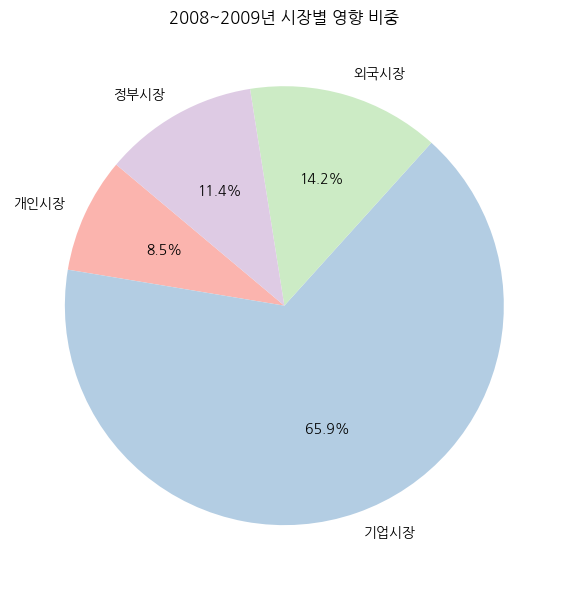

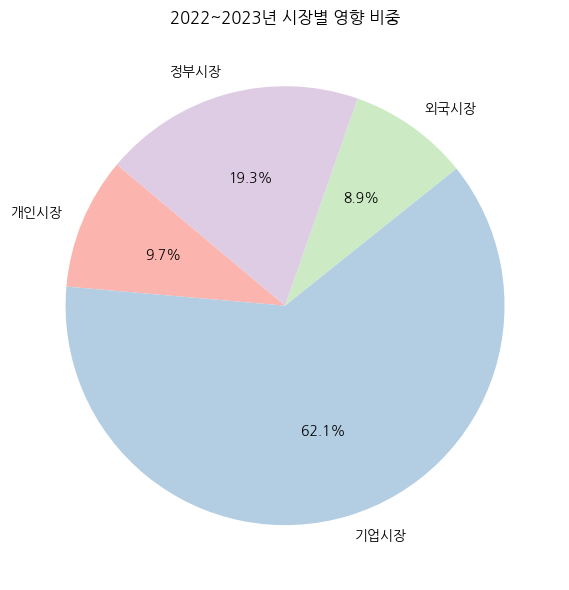

In [ ]:
import matplotlib.pyplot as plt

def plot_market_pie(cor_df, title):
    cor_df['abs_corr'] = cor_df['상관계수'].abs()
    market_sum = cor_df.groupby('시장')['abs_corr'].sum()
    market_ratio = market_sum / market_sum.sum()

    # 파이차트
    plt.figure(figsize=(6, 6))
    plt.pie(market_ratio, labels=market_ratio.index, autopct='%1.1f%%', startangle=140,
            colors=plt.cm.Pastel1.colors)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 실행
plot_market_pie(cor_0809, "2008~2009년 시장별 영향 비중")
plot_market_pie(cor_2223, "2022~2023년 시장별 영향 비중")

- 전반적으로 기업시장 변수가 항상 우세하며, 경제 흐름을 주도해온 구조가 유지됨.

- 다만 정부시장의 변수 비중이 눈에 띄게 증가 → 금리, 채권수익률, GDP 등 거시 정책 변수의 중요성 상승 가능성 시사.

- 외국시장 변수는 2022~2023년 들어 상대적으로 감소 → 글로벌 연계보다 국내 정책 영향 비중이 커졌을 수 있음.

## p-value > 0.05 로 유효하지 않은 변수들 상관계수 0으로 계산

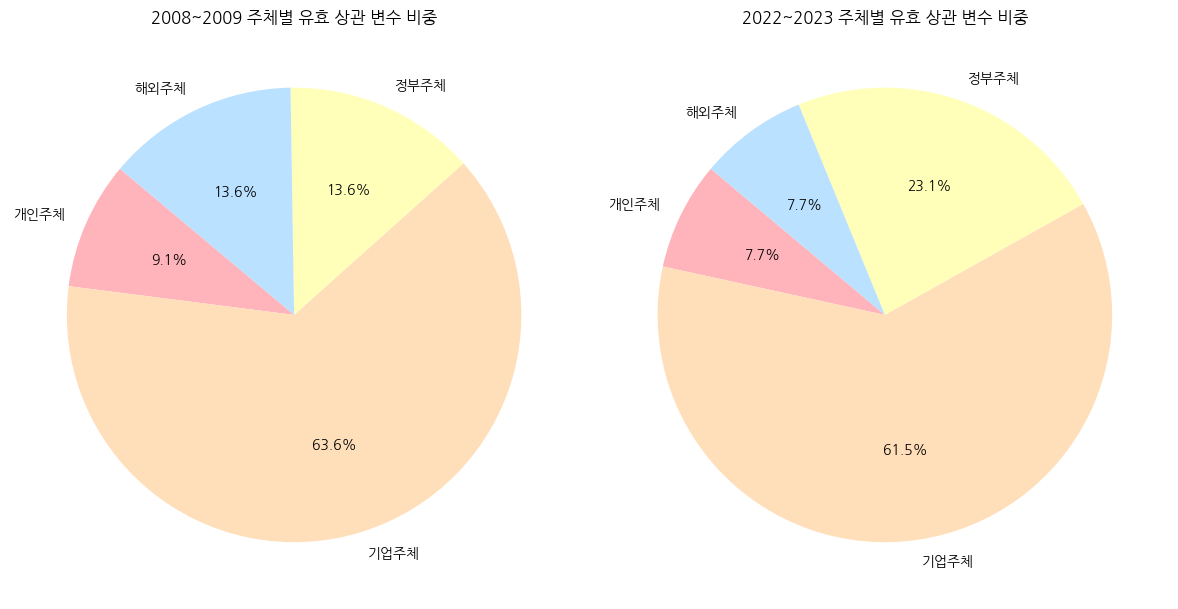

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 공통 함수: 유효 변수 카운트 계산
def process_data(data):
    df = pd.DataFrame(data, columns=['변수명', '주체', '상관계수', 'p-value'])
    df['유효한 상관계수'] = df.apply(lambda row: row['상관계수'] if row['p-value'] < 0.05 else 0, axis=1)
    return df[df['유효한 상관계수'] != 0].groupby('주체').size()

# 2008~2009년 데이터
data_0809 = [
    ['한국 외환 보유액', '해외주체', -0.845, 0.0000], ['한국 상품수지', '해외주체', 0.900, 0.0000],
    ['한국 경상수지', '해외주체', 0.917, 0.0000], ['한국 실업률', '개인주체', 0.579, 0.0030],
    ['인플레이션율', '개인주체', -0.252, 0.2355], ['경제 심리 지수', '개인주체', -0.762, 0.0000],
    ['WTI 유가', '기업주체', -0.869, 0.0000], ['두바이 유가', '기업주체', -0.868, 0.0000],
    ['Brent 유가', '기업주체', -0.874, 0.0000], ['천연가스 가격', '기업주체', -0.693, 0.0002],
    ['유연탄 가격', '기업주체', -0.673, 0.0003], ['철광석 가격', '기업주체', 0.200, 0.3490],
    ['구리 가격', '기업주체', -0.943, 0.0000], ['알루미늄 가격', '기업주체', -0.895, 0.0000],
    ['니켈 가격', '기업주체', -0.935, 0.0000], ['아연 가격', '기업주체', -0.880, 0.0000],
    ['금 가격', '기업주체', -0.177, 0.4075], ['대두 가격', '기업주체', -0.848, 0.0000],
    ['옥수수 가격', '기업주체', -0.757, 0.0000], ['소맥 가격', '기업주체', -0.791, 0.0000],
    ['원당 가격', '기업주체', -0.065, 0.7617], ['원면 가격', '기업주체', -0.935, 0.0000],
    ['미국 주가지수', '기업주체', -0.973, 0.0000], ['한국 10년 채권수익률', '정부주체', -0.487, 0.0158],
    ['미국 기준 금리', '정부주체', -0.816, 0.0000], ['실질GDP', '정부주체', -0.693, 0.0002],
    ['실질GDP성장률', '정부주체', 0.142, 0.5070]
]

# 2022~2023년 데이터
data_2223 = [
    ['한국 외환 보유액', '해외주체', -0.826, 0.0000], ['한국 상품수지', '해외주체', -0.106, 0.6206],
    ['한국 경상수지', '해외주체', -0.066, 0.7608], ['한국 실업률', '개인주체', -0.369, 0.0757],
    ['인플레이션율', '개인주체', 0.184, 0.3883], ['경제 심리 지수', '개인주체', -0.538, 0.0066],
    ['WTI 유가', '기업주체', -0.248, 0.2425], ['두바이 유가', '기업주체', -0.179, 0.4014],
    ['Brent 유가', '기업주체', -0.205, 0.3357], ['천연가스 가격', '기업주체', 0.086, 0.6892],
    ['유연탄 가격', '기업주체', 0.075, 0.7263], ['철광석 가격', '기업주체', -0.792, 0.0000],
    ['구리 가격', '기업주체', -0.863, 0.0000], ['알루미늄 가격', '기업주체', -0.750, 0.0000],
    ['니켈 가격', '기업주체', -0.460, 0.0237], ['아연 가격', '기업주체', -0.550, 0.0053],
    ['금 가격', '기업주체', -0.354, 0.0893], ['대두 가격', '기업주체', -0.514, 0.0103],
    ['옥수수 가격', '기업주체', -0.120, 0.5761], ['소맥 가격', '기업주체', -0.297, 0.1590],
    ['원당 가격', '기업주체', 0.196, 0.3589], ['원면 가격', '기업주체', -0.495, 0.0138],
    ['미국 주가지수', '기업주체', -0.786, 0.0000], ['한국 10년 채권수익률', '정부주체', 0.856, 0.0000],
    ['미국 기준 금리', '정부주체', 0.541, 0.0064], ['실질GDP', '정부시장', -0.194, 0.3649],
    ['실질GDP성장률', '정부주체', 0.569, 0.0037]
]

# 처리 및 카운트
counts_0809 = process_data(data_0809)
counts_2223 = process_data(data_2223)

# 파스텔 톤 색상 설정
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAE1FF']  # 핑크, 살구, 연노랑, 하늘

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(counts_0809, labels=counts_0809.index, autopct='%1.1f%%',
            colors=pastel_colors[:len(counts_0809)], startangle=140)
axes[0].set_title('2008~2009 주체별 유효 상관 변수 비중')

axes[1].pie(counts_2223, labels=counts_2223.index, autopct='%1.1f%%',
            colors=pastel_colors[:len(counts_2223)], startangle=140)
axes[1].set_title('2022~2023 주체별 유효 상관 변수 비중')

plt.tight_layout()
plt.show()

- 정부시장의 유의 변수 비중이 2배 가까이 증가함 → 단순히 변수가 많아서가 아니라, 실제로 환율과 통계적으로 의미 있는 연관성이 커졌음을 반영.

- 외국시장 변수는 많이 포함되었지만 유의하지 않게 됨 → 외국 요인의 영향력이 감소했거나, 내부 시장 반응이 커졌을 가능성.

- 개인시장은 여전히 적은 영향 → 소비자나 가계 기반 요인은 환율 변화에 덜 민감하게 작용했음을 시사.

# 최종

#### p-value 적용

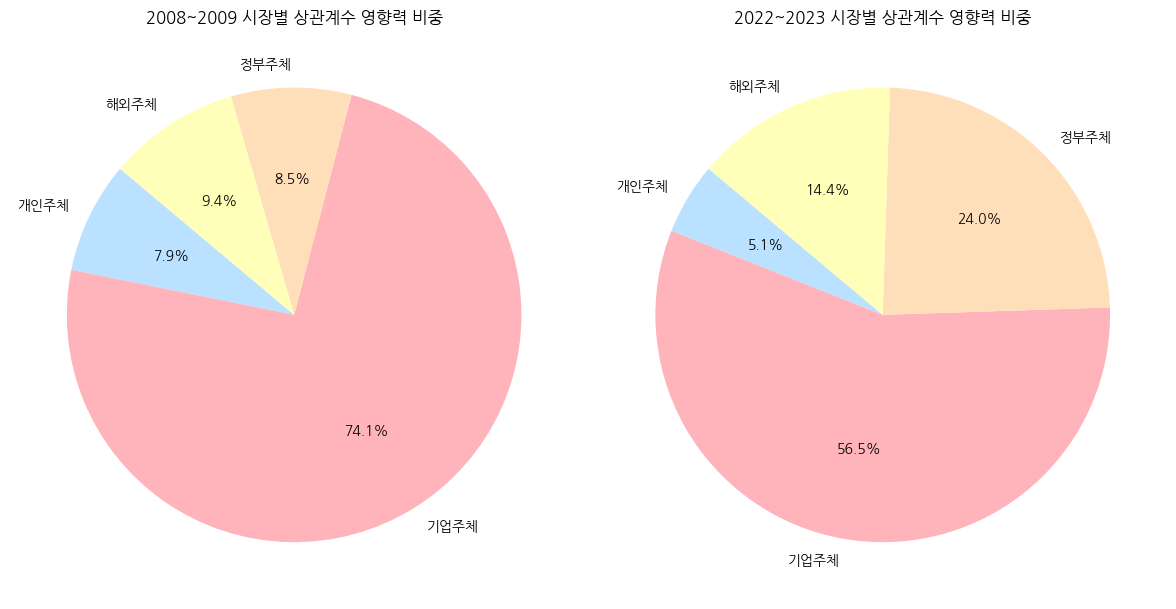

In [42]:
import matplotlib.pyplot as plt

# 1. 유의한 변수 필터링 (p < 0.05)
cor_0809_sig = cor_0809[cor_0809['p-value'] < 0.05].copy()
cor_2223_sig = cor_2223[cor_2223['p-value'] < 0.05].copy()

# 2. 절댓값 상관계수 추가
cor_0809_sig['abs_corr'] = cor_0809_sig['상관계수'].abs()
cor_2223_sig['abs_corr'] = cor_2223_sig['상관계수'].abs()

# 3. 시장별 절댓값 상관계수 합산
impact_0809 = cor_0809_sig.groupby('주체')['abs_corr'].sum()
impact_2223 = cor_2223_sig.groupby('주체')['abs_corr'].sum()

# 4. 파이차트 색상 (파스텔톤)
pastel_colors = ['#BAE1FF','#FFB3BA', '#FFDFBA', '#FFFFBA']

# 5. 파이차트 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(impact_0809, labels=impact_0809.index, autopct='%1.1f%%',
            colors=pastel_colors[:len(impact_0809)], startangle=140)
axes[0].set_title('2008~2009 시장별 상관계수 영향력 비중')

axes[1].pie(impact_2223, labels=impact_2223.index, autopct='%1.1f%%',
            colors=pastel_colors[:len(impact_2223)], startangle=140)
axes[1].set_title('2022~2023 시장별 상관계수 영향력 비중')

plt.tight_layout()
plt.show()


#### 변수의 평균 상관계수로 비중 구함

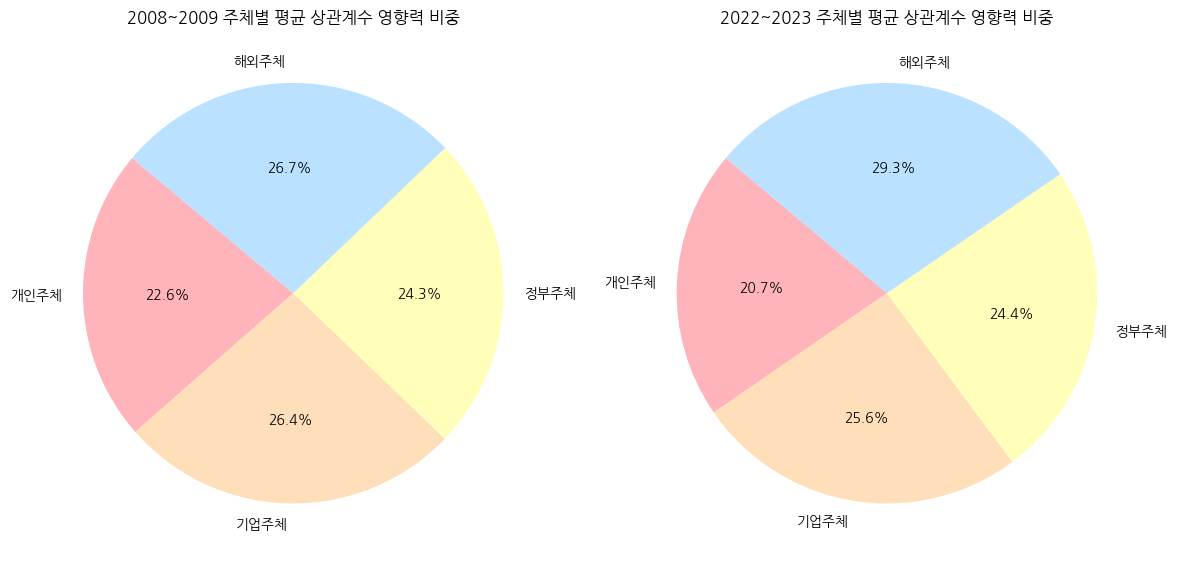

In [43]:
import matplotlib.pyplot as plt

# 1. 유의한 변수 필터링 (p-value < 0.05)
cor_0809_sig = cor_0809[cor_0809['p-value'] < 0.05].copy()
cor_2223_sig = cor_2223[cor_2223['p-value'] < 0.05].copy()

# 2. 절댓값 상관계수 컬럼 추가
cor_0809_sig['abs_corr'] = cor_0809_sig['상관계수'].abs()
cor_2223_sig['abs_corr'] = cor_2223_sig['상관계수'].abs()

# 3. 시장별 절댓값 평균 계산
impact_0809_avg = cor_0809_sig.groupby('주체')['abs_corr'].mean()
impact_2223_avg = cor_2223_sig.groupby('주체')['abs_corr'].mean()

# 4. 파이차트 색상 (파스텔톤)
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAE1FF']

# 5. 파이차트 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(impact_0809_avg, labels=impact_0809_avg.index, autopct='%1.1f%%',
            colors=pastel_colors[:len(impact_0809_avg)], startangle=140)
axes[0].set_title('2008~2009 주체별 평균 상관계수 영향력 비중')

axes[1].pie(impact_2223_avg, labels=impact_2223_avg.index, autopct='%1.1f%%',
            colors=pastel_colors[:len(impact_2223_avg)], startangle=140)
axes[1].set_title('2022~2023 주체별 평균 상관계수 영향력 비중')

plt.tight_layout()
plt.show()


### 변수 상관계수(절대값) 시점 비교

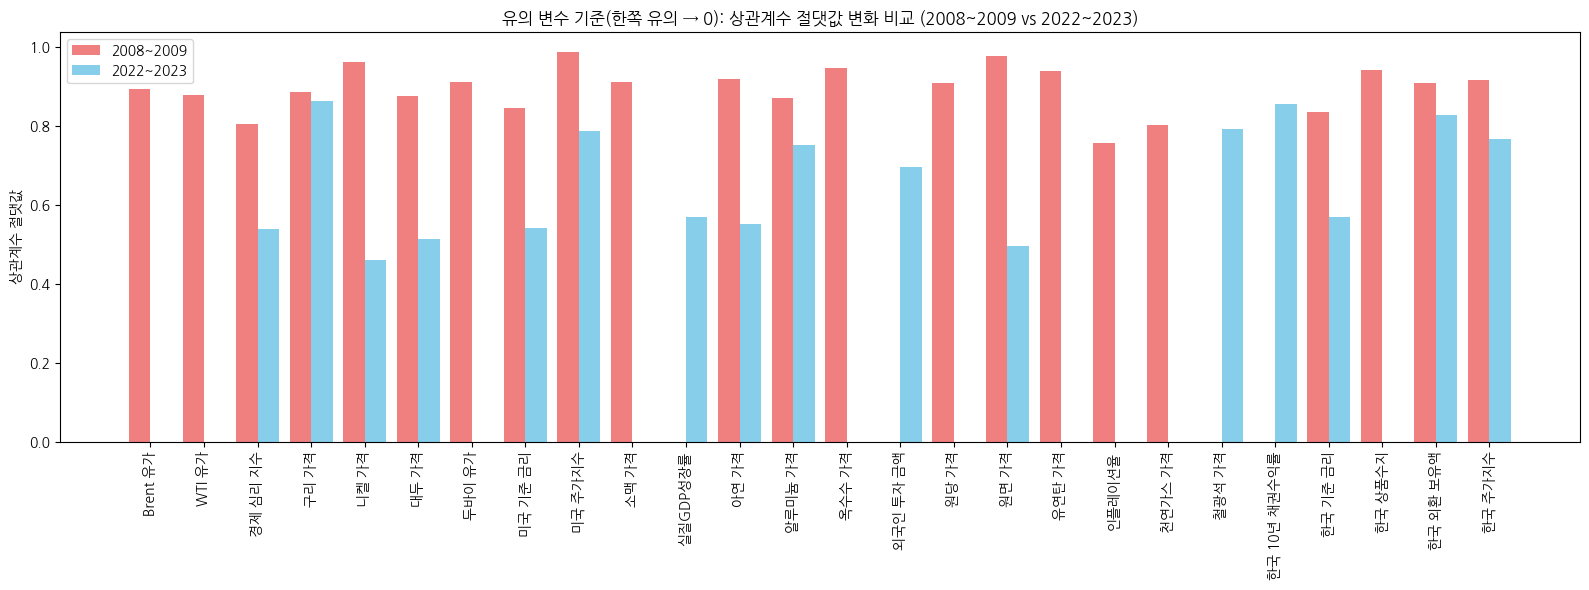

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 유효한 변수 필터링 (p-value < 0.05)
cor_0809_sig = cor_0809[cor_0809['p-value'] < 0.05][['변수명', '상관계수']]
cor_2223_sig = cor_2223[cor_2223['p-value'] < 0.05][['변수명', '상관계수']]

# 2. 상관계수 절댓값 추가
cor_0809_sig['abs_corr_0809'] = cor_0809_sig['상관계수'].abs()
cor_2223_sig['abs_corr_2223'] = cor_2223_sig['상관계수'].abs()

# 3. 변수 기준으로 병합 (유효한 것만 포함)
merged = pd.merge(cor_0809_sig[['변수명', 'abs_corr_0809']],
                  cor_2223_sig[['변수명', 'abs_corr_2223']],
                  on='변수명', how='outer').fillna(0)

# 4. 막대그래프 시각화
x = merged['변수명']
x_indexes = range(len(x))

plt.figure(figsize=(16, 6))
plt.bar(x_indexes, merged['abs_corr_0809'], width=0.4, label='2008~2009', color='lightcoral', align='center')
plt.bar([i + 0.4 for i in x_indexes], merged['abs_corr_2223'], width=0.4, label='2022~2023', color='skyblue', align='center')
plt.xticks([i + 0.2 for i in x_indexes], x, rotation=90)
plt.ylabel('상관계수 절댓값')
plt.title('유의 변수 기준(한쪽 유의 → 0): 상관계수 절댓값 변화 비교 (2008~2009 vs 2022~2023)')
plt.legend()
plt.tight_layout()
plt.show()


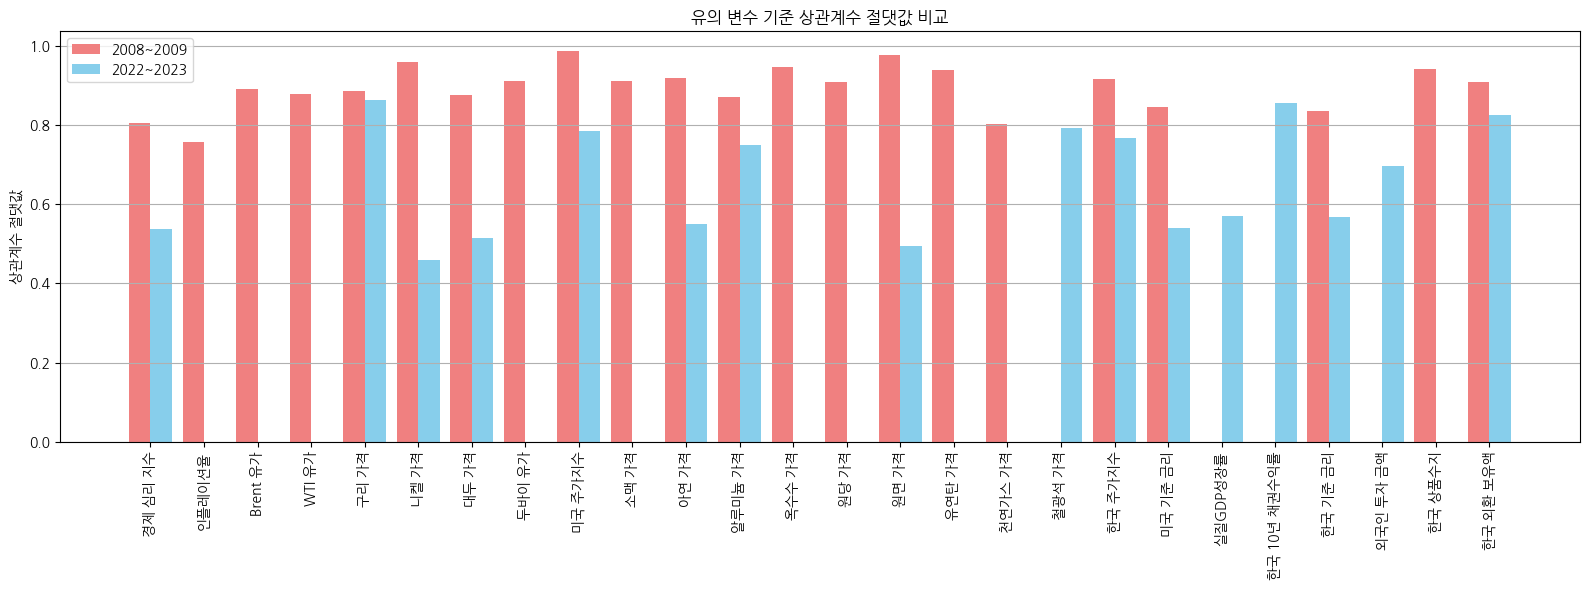

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 시장 정보 매핑 (다시 선언)
market_variables = {
    "외국시장": ['한국 외환 보유액', '한국 상품수지', '한국 경상수지', '외국인 투자 금액'],
    "개인시장": ['한국 실업률', '인플레이션율', '경제 심리 지수'],
    "기업시장": ['WTI 유가', '두바이 유가', 'Brent 유가',
                 '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격',
                 '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격', '미국 주가지수', '한국 주가지수'],
    "정부시장": ['한국 10년 채권수익률', '미국 기준 금리', '실질GDP', '실질GDP성장률', '미국 10년 채권수익률', '한국 기준 금리']
}
var_to_market = {var: market for market, var_list in market_variables.items() for var in var_list}

# 2. 시장 정보 컬럼 추가
merged['시장'] = merged['변수명'].map(var_to_market)

# 3. 사용자 지정 시장 정렬 순서
market_order = ['개인시장', '기업시장', '정부시장', '외국시장']
merged['시장순서'] = merged['시장'].map(lambda x: market_order.index(x) if x in market_order else 99)

# 4. 정렬 수행 (시장 > 변수명)
merged_sorted = merged.sort_values(by=['시장순서', '시장', '변수명'])

# 5. 시각화
plt.figure(figsize=(16, 6))
x_indexes = range(len(merged_sorted))

plt.bar(x_indexes, merged_sorted['abs_corr_0809'], width=0.4, label='2008~2009', color='lightcoral', align='center')
plt.bar([i + 0.4 for i in x_indexes], merged_sorted['abs_corr_2223'], width=0.4, label='2022~2023', color='skyblue', align='center')

plt.xticks([i + 0.2 for i in x_indexes], merged_sorted['변수명'], rotation=90)
plt.ylabel('상관계수 절댓값')
plt.title('유의 변수 기준 상관계수 절댓값 비교')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- 절대값 반영 안함

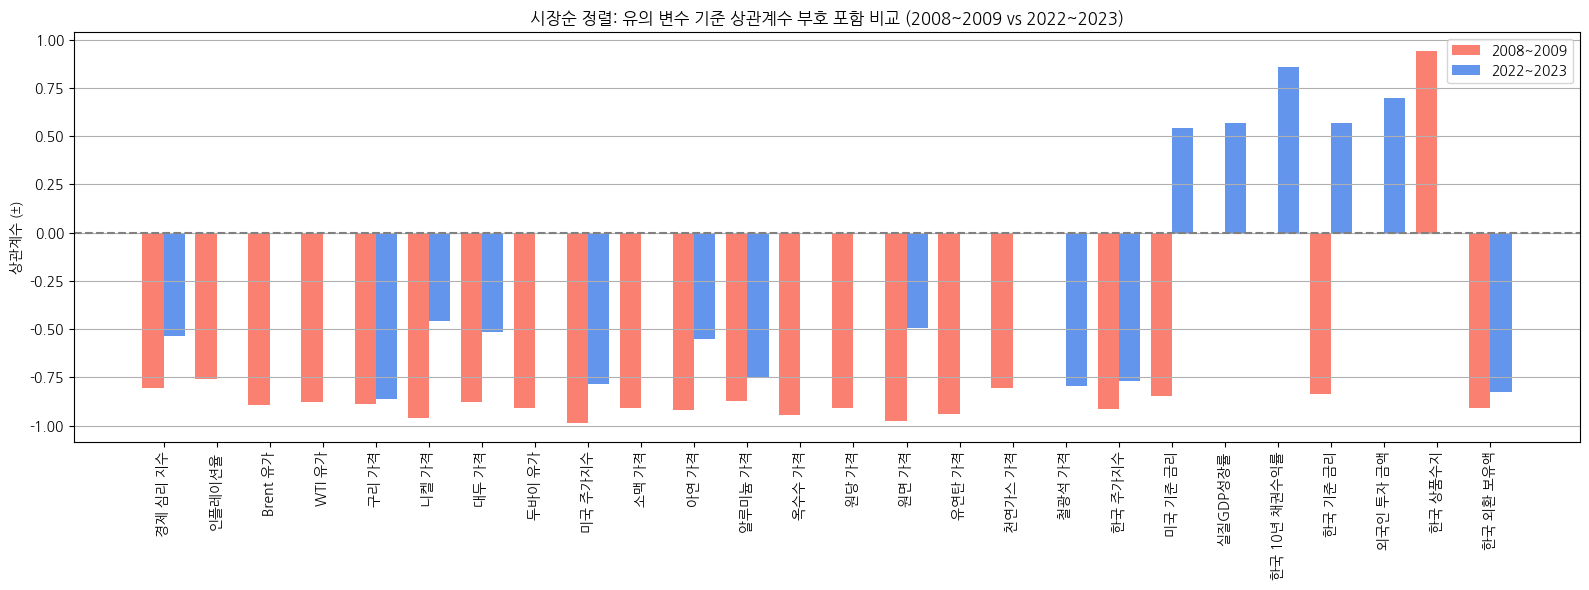

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 유의한 변수 필터링
cor_0809_sig = cor_0809[cor_0809['p-value'] < 0.05][['변수명', '상관계수']]
cor_2223_sig = cor_2223[cor_2223['p-value'] < 0.05][['변수명', '상관계수']]

# 2. 컬럼명 정리
cor_0809_sig = cor_0809_sig.rename(columns={'상관계수': '상관계수_0809'})
cor_2223_sig = cor_2223_sig.rename(columns={'상관계수': '상관계수_2223'})

# 3. outer join 후 NaN → 0 처리
merged_signed = pd.merge(
    cor_0809_sig,
    cor_2223_sig,
    on='변수명',
    how='outer'
).fillna(0)

# 4. 시장 정보 추가 및 순서 정렬
var_to_market = {var: market for market, var_list in market_variables.items() for var in var_list}
market_order = ['개인시장', '기업시장', '정부시장', '외국시장']
merged_signed['시장'] = merged_signed['변수명'].map(var_to_market)
merged_signed['시장순서'] = merged_signed['시장'].map(lambda x: market_order.index(x) if x in market_order else 99)
merged_signed_sorted = merged_signed.sort_values(by=['시장순서', '시장', '변수명'])

# 5. 시각화 (부호 포함)
plt.figure(figsize=(16, 6))
x_indexes = range(len(merged_signed_sorted))

plt.bar(x_indexes, merged_signed_sorted['상관계수_0809'], width=0.4, label='2008~2009', color='salmon', align='center')
plt.bar([i + 0.4 for i in x_indexes], merged_signed_sorted['상관계수_2223'], width=0.4, label='2022~2023', color='cornflowerblue', align='center')

plt.xticks([i + 0.2 for i in x_indexes], merged_signed_sorted['변수명'], rotation=90)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('상관계수 (±)')
plt.title('시장순 정렬: 유의 변수 기준 상관계수 부호 포함 비교 (2008~2009 vs 2022~2023)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- 시장별 출력

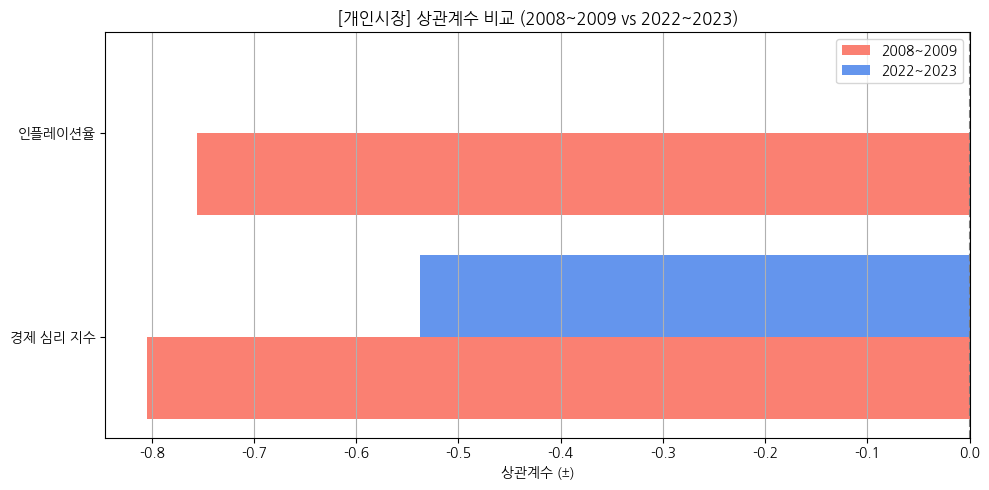

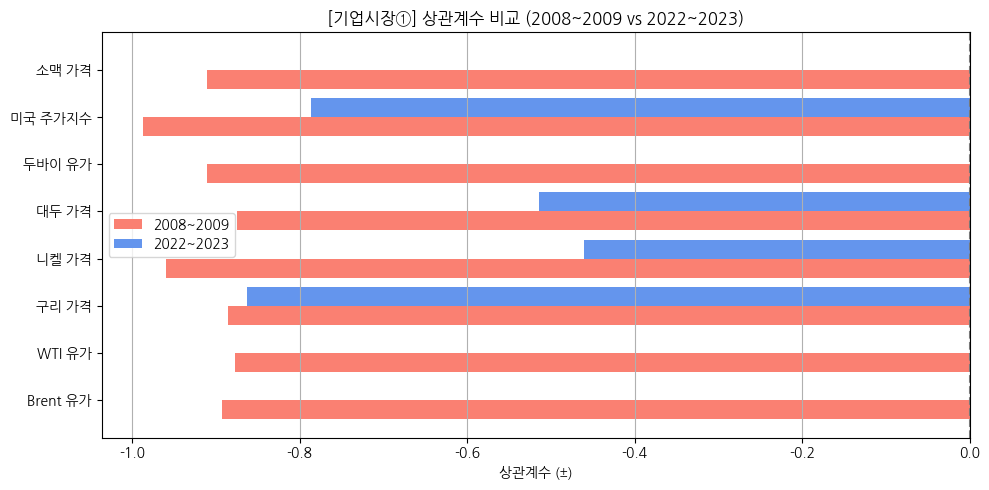

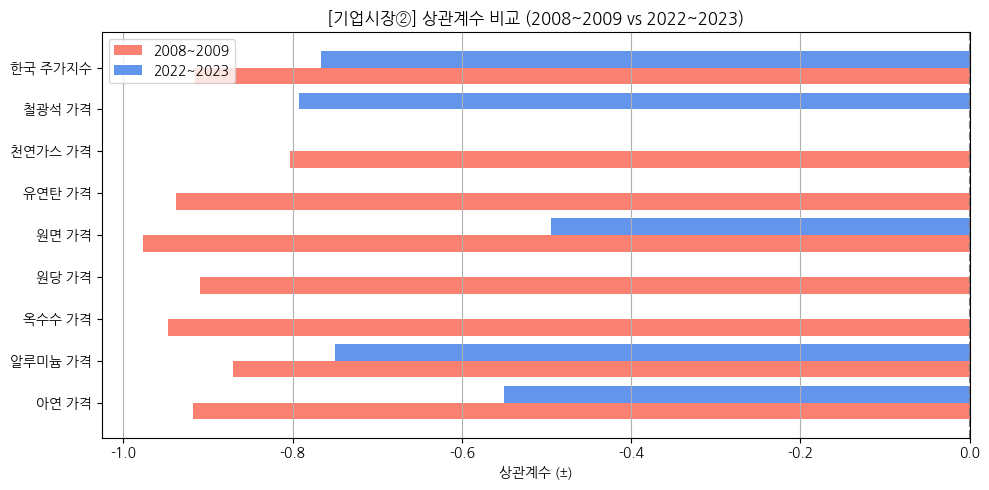

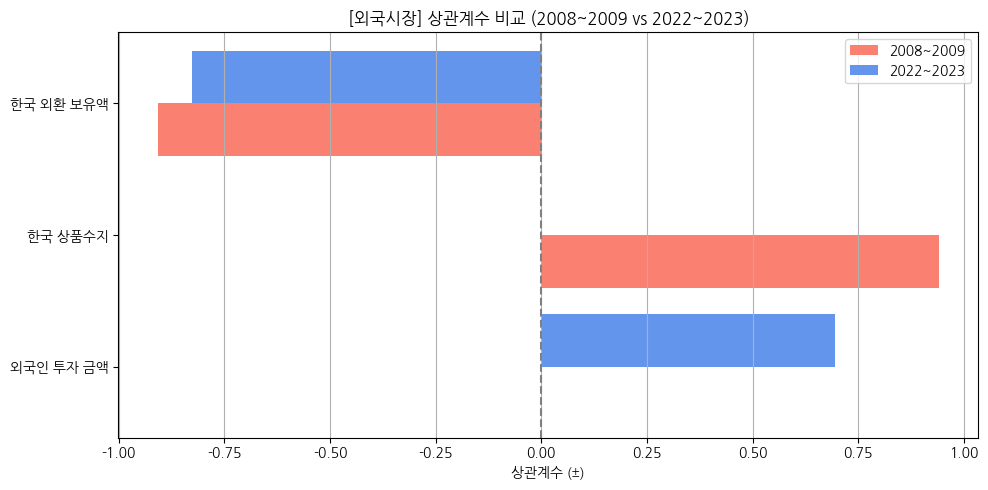

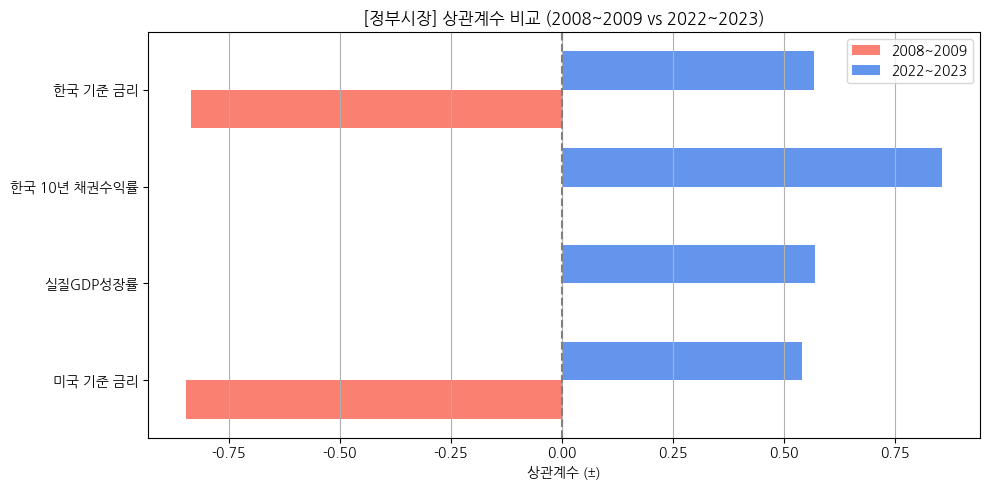

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 유효한 변수 병합 (한 쪽 유효하면 포함, 유효하지 않은 쪽은 0으로 대체)
cor_0809_sig = cor_0809[cor_0809['p-value'] < 0.05][['변수명', '상관계수']].rename(columns={'상관계수': '상관계수_0809'})
cor_2223_sig = cor_2223[cor_2223['p-value'] < 0.05][['변수명', '상관계수']].rename(columns={'상관계수': '상관계수_2223'})
merged_signed = pd.merge(cor_0809_sig, cor_2223_sig, on='변수명', how='outer').fillna(0)

# 2. 시장 분류 정보
market_variables = {
    "외국시장": ['한국 외환 보유액', '한국 상품수지', '한국 경상수지', '외국인 투자 금액'],
    "개인시장": ['한국 실업률', '인플레이션율', '경제 심리 지수'],
    "기업시장": ['WTI 유가', '두바이 유가', 'Brent 유가',
                 '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격',
                 '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격', '미국 주가지수', '한국 주가지수'],
    "정부시장": ['한국 10년 채권수익률', '미국 기준 금리', '실질GDP', '실질GDP성장률', '미국 10년 채권수익률', '한국 기준 금리']
}
var_to_market = {var: market for market, var_list in market_variables.items() for var in var_list}
market_order = ['개인시장', '기업시장', '정부시장', '외국시장']

# 3. 시장 정보 추가 및 정렬
merged_signed['시장'] = merged_signed['변수명'].map(var_to_market)
merged_signed['시장순서'] = merged_signed['시장'].map(lambda x: market_order.index(x) if x in market_order else 99)
merged_sorted = merged_signed.sort_values(by=['시장순서', '시장', '변수명'])

# 4. 가로 막대그래프 함수
def plot_market_comparison_horizontal(df, title):
    y_indexes = range(len(df))
    plt.figure(figsize=(10, max(5, len(df) * 0.4)))
    plt.barh(y_indexes, df['상관계수_0809'], height=0.4, label='2008~2009', color='salmon', align='center')
    plt.barh([i + 0.4 for i in y_indexes], df['상관계수_2223'], height=0.4, label='2022~2023', color='cornflowerblue', align='center')
    plt.yticks([i + 0.2 for i in y_indexes], df['변수명'])
    plt.axvline(0, color='gray', linestyle='--')
    plt.xlabel('상관계수 (±)')
    plt.title(title)
    plt.legend()
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

# 5. 시장별 출력 (기업은 2개로 분할)
for market, df_market in merged_sorted.groupby('시장'):
    if market == '기업시장' and len(df_market) > 10:
        mid = len(df_market) // 2
        df1, df2 = df_market.iloc[:mid], df_market.iloc[mid:]
        plot_market_comparison_horizontal(df1, '[기업시장①] 상관계수 비교 (2008~2009 vs 2022~2023)')
        plot_market_comparison_horizontal(df2, '[기업시장②] 상관계수 비교 (2008~2009 vs 2022~2023)')
    else:
        plot_market_comparison_horizontal(df_market, f'[{market}] 상관계수 비교 (2008~2009 vs 2022~2023)')
